# 분석2 : CLI 에 따른 lab data 
## TOC
* [데이터 탐색](#Lab-data-살펴보기)
* [데이터 검정](#Lab-data-검정)
* [검정결과](#Lab-data-검정-결과)

### CLI 집단과 비CLI 집단 사이의 lab 수치 비교

Average CFU, VEGF, VEGF/CD34, CD34, SDF-1, VEGF : 연속형 데이터
    
    => t-test or wilcoxon

In [1]:
#데이터 불러오기
library(xlsx)
library(dplyr)

data <- read.xlsx("../EPCinCKD_201802.xlsx", sheetIndex = 1)
data <- data[1:150,-c(1,2)]
colnames(data)[c(7, 13, 15, 16, 22)] <- c("HTN", "statin", "obesity", "PAD", "CD34.All")
data <- data %>% mutate( CLI = as.numeric(Group>=5))

Loading required package: rJava
Loading required package: xlsxjars

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



## Lab data 살펴보기

CLI 혹은 PAD 유무를 기준으로 나눈 집단에서 

Average CFU, VEGF, VEGF/CD34, CD34, SDF-1, VEGF 수치 확인


In [155]:
# CLI 그룹별 비교

cat("\n<CLI 그룹에 따른 Lab data 비교>\n")
cat("\n<평균>\n")
data %>% 
    group_by( CLI ) %>%
    summarise( mean.Average.CFU = mean(Average.CFU, na.rm = T),
            mean.VEGF = mean(VEGF, na.rm = T),
            mean.CD34.VEGF = mean(CD34.VEGF, na.rm=T),
            mean.CD34 = mean(CD34, na.rm = T),
            mean.VEGF.All = mean(VEGF.All, na.rm = T),
            mean.CD34.All = mean(CD34.All, na.rm = T),
            mean.VEGF.1 = mean(VEGF.1, na.rm = T),
            mean.SDF.1 = mean(SDF.1, na.rm = T)
             ) %>%
    mutate_if(is.numeric, funs(round(., 2)))


cat("\n<표준편차>\n")
data %>% 
    group_by( CLI ) %>%
    summarise( std.Average.CFU = sqrt(var(Average.CFU, na.rm = T)),
            std.VEGF = sqrt(var(VEGF, na.rm = T)),
            std.CD34.VEGF = sqrt(var(CD34.VEGF, na.rm=T)),
            std.CD34 = sqrt(var(CD34, na.rm = T)),
            std.VEGF.All = sqrt(var(VEGF.All, na.rm = T)),
            std.CD34.All = sqrt(var(CD34.All, na.rm = T)),
            std.VEGF.1 = sqrt(var(VEGF.1, na.rm = T)),
            std.SDF.1 = sqrt(var(SDF.1, na.rm = T))
             ) %>%
    mutate_if(is.numeric, funs(round(., 2)))


<CLI 그룹에 따른 Lab data 비교>

<평균>


CLI,mean.Average.CFU,mean.VEGF,mean.CD34.VEGF,mean.CD34,mean.VEGF.All,mean.CD34.All,mean.VEGF.1,mean.SDF.1
0,5.26,6.32,0.31,0.11,6.63,0.41,66.85,2390.31
1,4.91,3.37,0.32,0.50,3.69,0.82,123.24,3260.86



<표준편차>


CLI,std.Average.CFU,std.VEGF,std.CD34.VEGF,std.CD34,std.VEGF.All,std.CD34.All,std.VEGF.1,std.SDF.1
0,1.50,4.09,0.26,0.27,4.17,0.39,48.55,525.74
1,1.16,4.70,0.38,1.54,4.75,1.86,125.47,969.18


표본표준편차에 비하여 평균이 큰 차이가 나 보이는 녀석들은 없다. SDF.1 정도?



<CLI 그룹에 따른 Lab data 시각화>


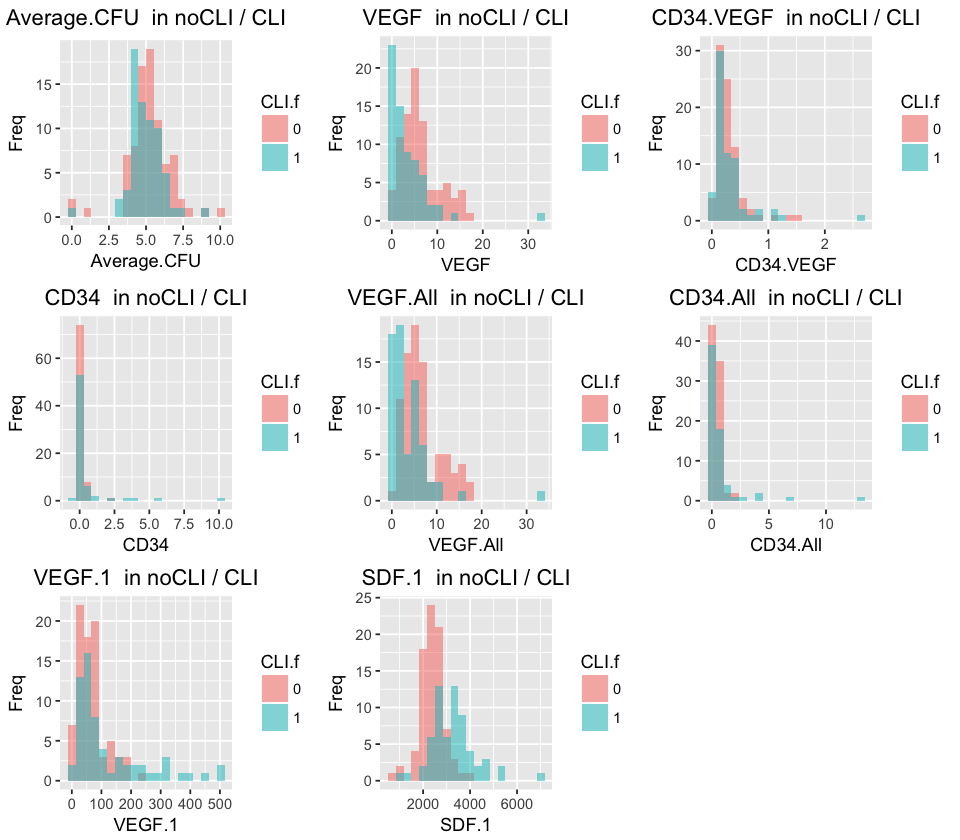

In [228]:
# 각각의 값에 대한 그래프 그리기
plots <- list()

for(key in c('Average.CFU', 'VEGF', 'CD34.VEGF', 'CD34', 'VEGF.All', 'CD34.All', 'VEGF.1', 'SDF.1')){

    p<- data %>% 
        mutate(CLI.f = as.factor(CLI)) %>%
        ggplot(aes_string(x=key, fill = "CLI.f")) +
        geom_histogram(alpha=0.5, position="identity",bins = 30, na.rm = T) +  
        ggtitle(paste(key, " in noCLI / CLI")) +
        labs(x=key, y="Freq") +
        theme(plot.title = element_text(hjust = 0.5))
    
    plots[[key]] <- p
}

options(repr.plot.width=8, repr.plot.height=7)
cat("\n\n<CLI 그룹에 따른 Lab data 시각화>\n")
grid.arrange(grobs=plots, ncol=3)



<CLI 그룹에 따른 Lab data 정규성 시각화>


Warning message:
“Removed 5 rows containing non-finite values (stat_qq).”Warning message:
“Removed 5 rows containing non-finite values (stat_qq).”

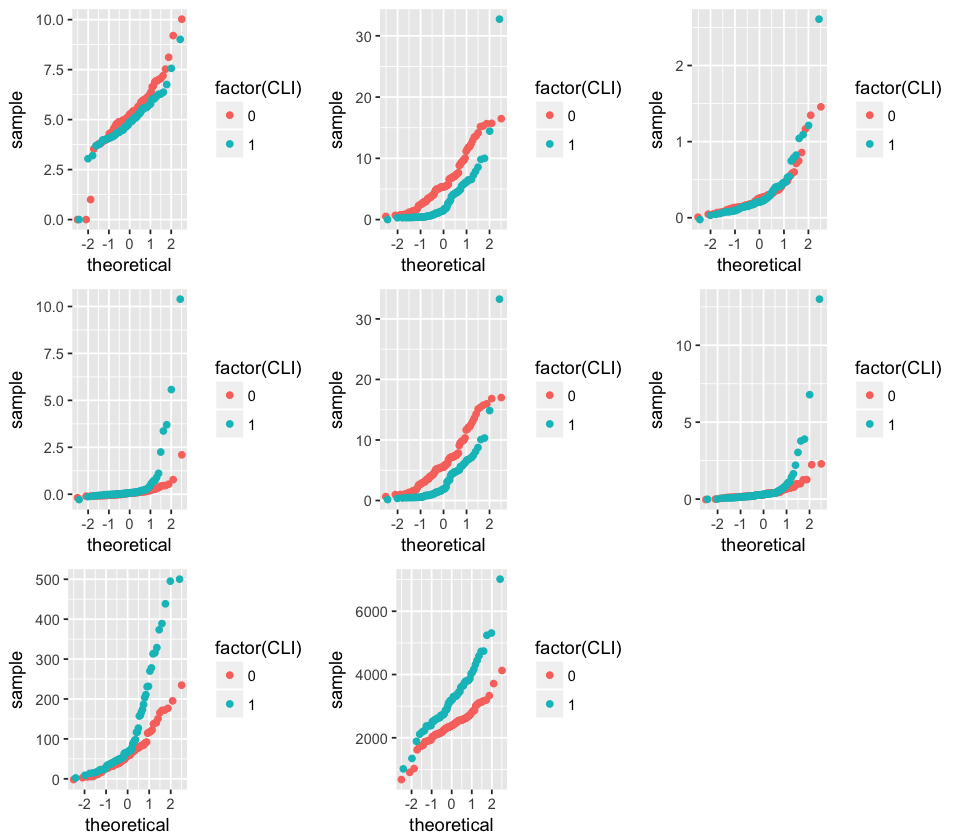

In [133]:
# 정규성 그래프

par(mfrow = c(3, 3))

for(key in c('Average.CFU', 'VEGF', 'CD34.VEGF', 'CD34', 'VEGF.All', 'CD34.All', 'VEGF.1', 'SDF.1')){
    p <- data %>% ggplot(aes_string(sample = key)) + stat_qq(aes(color=factor(CLI)))

    plots[[key]] <- p
}
options(repr.plot.width=8, repr.plot.height=7)
cat("\n\n<CLI 그룹에 따른 Lab data 정규성 시각화>\n")
grid.arrange(grobs=plots, ncol=3)

In [144]:
cat("\n<CLI 그룹에 따른 Lab data, 정규성 검정 결과>\n")
data %>% 
    group_by( CLI ) %>%
    summarise( Average.CFU = shapiro.test(Average.CFU)$p.value,
            VEGF = shapiro.test(VEGF)$p.value,
            CD34.VEGF = shapiro.test(CD34.VEGF)$p.value,
            CD34 = shapiro.test(CD34)$p.value,
            VEGF.All = shapiro.test(VEGF.All)$p.value,
            CD34.All = shapiro.test(CD34.All)$p.value,
            VEGF.1 = shapiro.test(VEGF.1)$p.value,
            SDF.1 = shapiro.test(SDF.1)$p.value
             ) %>%
    mutate_if(is.numeric, funs(round(., 4)))


<CLI 그룹에 따른 Lab data, 정규성 검정 결과>


CLI,Average.CFU,VEGF,CD34.VEGF,CD34,VEGF.All,CD34.All,VEGF.1,SDF.1
0,0e+00,1e-04,0,0,1e-04,0,0,0.0020
1,1e-04,0e+00,0,0,0e+00,0,0,0.0073


정규성을 만족하는 녀석들은 없다. 

In [188]:
cat("\n<CLI 그룹에 따른 로그변환 Lab data, 정규성 검정 결과>\n")
data %>% 
    group_by( CLI ) %>%
    summarise( log.Average.CFU = shapiro.test(log(Average.CFU))$p.value,
            log.VEGF = shapiro.test(log(VEGF))$p.value,
            log.CD34.VEGF = shapiro.test(log(CD34.VEGF))$p.value,
            log.CD34 = shapiro.test(log(CD34))$p.value,
            log.VEGF.All = shapiro.test(log(VEGF.All))$p.value,
            log.CD34.All = shapiro.test(log(CD34.All))$p.value,
            log.VEGF.1 = shapiro.test(log(VEGF.1))$p.value,
            log.SDF.1 = shapiro.test(log(SDF.1))$p.value
             ) %>%
    mutate_if(is.numeric, funs(round(., 4)))


<CLI 그룹에 따른 로그변환 Lab data, 정규성 검정 결과>


Warning message in log(CD34.VEGF):
“NaN이 생성되었습니다”Warning message in log(CD34):
“NaN이 생성되었습니다”Warning message in log(CD34):
“NaN이 생성되었습니다”Warning message in log(CD34.All):
“NaN이 생성되었습니다”Warning message in log(CD34.All):
“NaN이 생성되었습니다”Warning message in log(VEGF.1):
“NaN이 생성되었습니다”

CLI,log.Average.CFU,log.VEGF,log.CD34.VEGF,log.CD34,log.VEGF.All,log.CD34.All,log.VEGF.1,log.SDF.1
0,NaN,0.0012,0.0011,0.7485,0.0034,0.5097,0.0005,0.0000
1,NaN,0.0002,0.7798,0.3328,0.1149,0.0000,0.1223,0.0165


log 변환해도 정규성을 따른다고 볼만한 변수는 CD 34 뿐이다. 

위 결과를 기반으로 하면 대부분의 변수에 wilcoxon rank sum 검정을 실시해야하고, 

CD 34 만 로그 변환 후 t-test 를 시도해볼만한 가치가 있겠다. 

변수들간의 상관관계를 파악해보자. 

,Average.CFU,VEGF,VEGF.All,CD34.VEGF,CD34,CD34.All,VEGF.1,SDF.1
Average.CFU,1,0.12,0.11,-0.06,-0.13,-0.12,-0.11,-0.16
VEGF,NA,1.00,1.00,0.16,-0.10,-0.04,-0.10,-0.22
VEGF.All,NA,NA,1.00,0.23,-0.06,0.01,-0.08,-0.21
CD34.VEGF,NA,NA,NA,1.00,0.60,0.75,0.24,0.09
CD34,NA,NA,NA,NA,1.00,0.98,0.27,0.12
CD34.All,NA,NA,NA,NA,NA,1.00,0.28,0.12
VEGF.1,NA,NA,NA,NA,NA,NA,1.00,0.40
SDF.1,NA,NA,NA,NA,NA,NA,NA,1.00


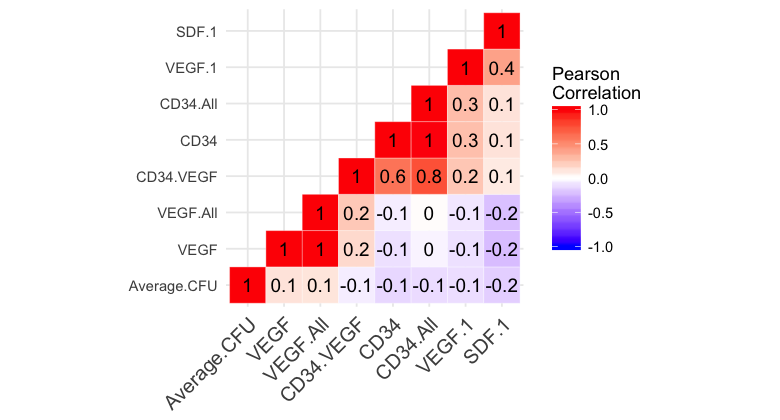

In [60]:
# 상관 계수를 살펴보자 

library(reshape2)

cormat <- round(cor(data[c(17, 18,21, 19, 20 ,22, 23, 24)], use = 'complete.obs'),2)
cormat[lower.tri(cormat)]<- NA
cormat
melted_cormat <- melt(cormat, na.rm = TRUE)

ggplot(data = melted_cormat, aes(Var2, Var1, fill = value))+
    geom_tile(color = "white")+
    scale_fill_gradient2(low = "blue", high = "red", mid = "white", 
                         midpoint = 0, limit = c(-1,1), space = "Lab", 
                         name="Pearson\nCorrelation") +
    theme_minimal()+ 
    theme(axis.text.x = element_text(angle = 45, vjust = 1, 
                                     size = 12, hjust = 1) , 
          axis.title.x=element_blank(), 
          axis.title.y=element_blank())+
    coord_fixed() + geom_text(aes(Var2, Var1, label = round(value,1)), color = "black", size = 4)

위 결과를 봤을 때, 
- CD34
- CD34.All
- CD34.VEGF

는 상관 관계가 매우 높아, 거의 한 변수로 봐도 될 정도

- VEGF
- VEGF.All

도 마찬가지 

log 에 대해서도 살펴보면

Warning message in FUN(X[[i]], ...):
“NaN이 생성되었습니다”Warning message in FUN(X[[i]], ...):
“NaN이 생성되었습니다”Warning message in FUN(X[[i]], ...):
“NaN이 생성되었습니다”Warning message in FUN(X[[i]], ...):
“NaN이 생성되었습니다”

,Average.CFU,VEGF,VEGF.All,CD34.VEGF,CD34,CD34.All,VEGF.1,SDF.1
Average.CFU,1,-0.02,-0.01,0.04,-0.02,0.01,-0.16,-0.04
VEGF,NA,1.00,0.96,0.27,0.00,0.08,-0.13,-0.31
VEGF.All,NA,NA,1.00,0.38,0.09,0.20,-0.15,-0.30
CD34.VEGF,NA,NA,NA,1.00,0.40,0.77,0.07,0.12
CD34,NA,NA,NA,NA,1.00,0.82,0.04,0.09
CD34.All,NA,NA,NA,NA,NA,1.00,0.07,0.16
VEGF.1,NA,NA,NA,NA,NA,NA,1.00,0.36
SDF.1,NA,NA,NA,NA,NA,NA,NA,1.00


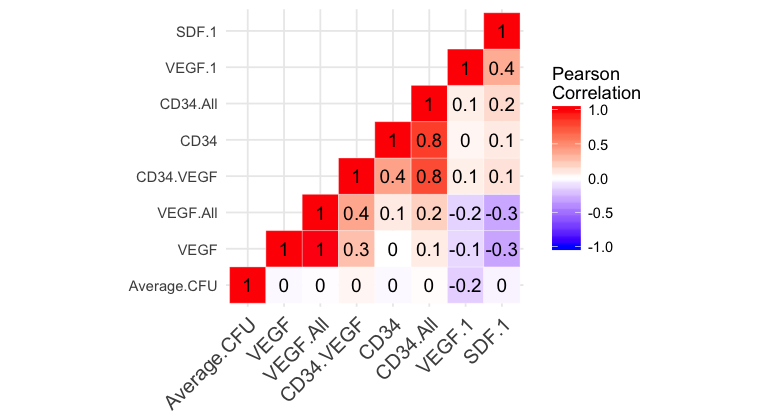

In [61]:
# 상관 계수를 살펴보자 

library(reshape2)

cormat <- round(cor(log(data[c(17, 18, 21, 19, 20 ,22, 23, 24)] + 1e-5), use = 'complete.obs'),2)
cormat[lower.tri(cormat)]<- NA
cormat
melted_cormat <- melt(cormat, na.rm = TRUE)

ggplot(data = melted_cormat, aes(Var2, Var1, fill = value))+
    geom_tile(color = "white")+
    scale_fill_gradient2(low = "blue", high = "red", mid = "white", 
                         midpoint = 0, limit = c(-1,1), space = "Lab", 
                         name="Pearson\nCorrelation") +
    theme_minimal()+ 
    theme(axis.text.x = element_text(angle = 45, vjust = 1, 
                                     size = 12, hjust = 1) , 
          axis.title.x=element_blank(), 
          axis.title.y=element_blank())+
    coord_fixed() + geom_text(aes(Var2, Var1, label = round(value,1)), color = "black", size = 4)

거의 비슷한 결과 

CD34 = CD34.All ~=CD34.VEGF

VEGF = VEGF.All 

VEGF.1 ~= SDF.1 

Average.CFU

## Lab data 검정

In [160]:
# Wilcoxon rank sum test for lab data

for(key in c('Average.CFU', 'VEGF', 'CD34.VEGF', 'CD34', 'VEGF.All', 'CD34.All', 'VEGF.1', 'SDF.1')){
    test <- wilcox.test(data[key][,1], data["CLI"][,1])
    cat("\n", key, "result :", "p-value =", test$p.value, '\n')
}


 Average.CFU result : p-value = 2.708907e-49 

 VEGF result : p-value = 2.302688e-36 

 CD34.VEGF result : p-value = 0.03191828 

 CD34 result : p-value = 0.002531329 

 VEGF.All result : p-value = 6.656316e-39 

 CD34.All result : p-value = 0.008142576 

 VEGF.1 result : p-value = 3.445605e-50 

 SDF.1 result : p-value = 1.492223e-51 


In [229]:
# log 값에 대한 분석 

for(key in c('Average.CFU', 'VEGF', 'CD34.VEGF', 'CD34', 'VEGF.All', 'CD34.All', 'VEGF.1', 'SDF.1')){
    test <- wilcox.test(log(data[key][,1]+1e-5), data["CLI"][,1])
    cat("\n", key, "result :", "p-value =", test$p.value, '\n')
}


 Average.CFU result : p-value = 8.692719e-48 

 VEGF result : p-value = 1.554135e-12 


Warning message in log(data[key][, 1] + 1e-05):
“NaN이 생성되었습니다”


 CD34.VEGF result : p-value = 4.537113e-47 


Warning message in log(data[key][, 1] + 1e-05):
“NaN이 생성되었습니다”


 CD34 result : p-value = 4.270591e-35 

 VEGF.All result : p-value = 2.720166e-15 


Warning message in log(data[key][, 1] + 1e-05):
“NaN이 생성되었습니다”


 CD34.All result : p-value = 1.566098e-38 


Warning message in log(data[key][, 1] + 1e-05):
“NaN이 생성되었습니다”


 VEGF.1 result : p-value = 3.590014e-50 

 SDF.1 result : p-value = 1.492223e-51 


전부 차이가 있다. 

그렇다면 이것이 앞서 demographic data 의 차이로 인한 것은 아닌지 한 번 살펴보자. 

DM + HTN + smoking + alcohol + statin 이 녀석들에 대한 것들을 고정으로 두고, 분석을 실시해보자. 

In [15]:
for(key in c('Average.CFU', 'VEGF', 'CD34.VEGF', 'CD34', 'VEGF.All', 'CD34.All', 'VEGF.1', 'SDF.1')){
    tmp0 <- data %>% filter(HTN==0) 
    test0 <- wilcox.test(log(tmp0[key][,1]+1e-5), jitter(tmp0["CLI"][,1]))
    tmp1 <- data %>% filter(HTN==1) 
    test1 <- wilcox.test(log(tmp1[key][,1]+1e-5), jitter(tmp1["CLI"][,1]))
    cat("\n", key, "result :", "\n    test0 p-value =", test0$p.value, '\n    test1 p-value =',test1$p.value, "\n")
}


 Average.CFU result : 
    test0 p-value = 8.570426e-10 
    test1 p-value = 1.656361e-40 

 VEGF result : 
    test0 p-value = 0.5400782 
    test1 p-value = 8.650893e-12 


Warning message in log(tmp1[key][, 1] + 1e-05):
“NaN이 생성되었습니다”


 CD34.VEGF result : 
    test0 p-value = 1.628381e-08 
    test1 p-value = 1.613334e-38 


Warning message in log(tmp0[key][, 1] + 1e-05):
“NaN이 생성되었습니다”Warning message in log(tmp1[key][, 1] + 1e-05):
“NaN이 생성되었습니다”


 CD34 result : 
    test0 p-value = 5.010026e-07 
    test1 p-value = 2.787352e-27 

 VEGF.All result : 
    test0 p-value = 0.3222796 
    test1 p-value = 3.111242e-15 


Warning message in log(tmp0[key][, 1] + 1e-05):
“NaN이 생성되었습니다”Warning message in log(tmp1[key][, 1] + 1e-05):
“NaN이 생성되었습니다”


 CD34.All result : 
    test0 p-value = 1.172434e-06 
    test1 p-value = 1.688027e-31 


Warning message in log(tmp1[key][, 1] + 1e-05):
“NaN이 생성되었습니다”


 VEGF.1 result : 
    test0 p-value = 8.570426e-10 
    test1 p-value = 3.076277e-41 

 SDF.1 result : 
    test0 p-value = 8.570426e-10 
    test1 p-value = 2.491434e-42 


In [ ]:
이런 식으로 하나하나 해봐야하는건가..? 너무 구린데..? 각각 분류하다보면 표본 수도 작아질테고..? 

In [ ]:
로그 선형 모형을 쓰는 것도 하나의 방법이 될 수 있을 것 같다. 
생각해보자.  

#### 로지스틱 회귀

앞서 만든 회귀모형에 지표들을 넣었을때 유의미한 효과를 거둘 수 있을지 확인해보자 

In [10]:
model <- glm(CLI ~ DM + HTN + alcohol + statin + Average.CFU, family = binomial(),data = data)
summary(model)


Call:
glm(formula = CLI ~ DM + HTN + alcohol + statin + Average.CFU, 
    family = binomial(), data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8476  -0.8923  -0.4233   0.7194   2.6722  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   2.0101     1.2322   1.631 0.102834    
DM            1.2750     0.4166   3.060 0.002211 ** 
HTN          -1.0254     0.6751  -1.519 0.128771    
alcohol      -1.7035     0.5841  -2.917 0.003538 ** 
statin       -1.5531     0.4391  -3.537 0.000405 ***
Average.CFU  -0.1993     0.2529  -0.788 0.430690    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 191.82  on 138  degrees of freedom
Residual deviance: 143.43  on 133  degrees of freedom
  (11 observations deleted due to missingness)
AIC: 155.43

Number of Fisher Scoring iterations: 4


In [38]:
model <- glm(CLI ~ DM + HTN + alcohol + statin + VEGF, family = binomial(),data = data)
summary(model)


Call:
glm(formula = CLI ~ DM + HTN + alcohol + statin + VEGF, family = binomial(), 
    data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9175  -0.7079  -0.3333   0.6655   2.8049  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  1.73332    0.72641   2.386 0.017026 *  
DM           1.17936    0.42612   2.768 0.005646 ** 
HTN         -1.14231    0.67667  -1.688 0.091385 .  
alcohol     -1.53568    0.58149  -2.641 0.008268 ** 
statin      -1.46066    0.43348  -3.370 0.000753 ***
VEGF        -0.12680    0.05796  -2.188 0.028697 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 191.82  on 138  degrees of freedom
Residual deviance: 138.36  on 133  degrees of freedom
  (11 observations deleted due to missingness)
AIC: 150.36

Number of Fisher Scoring iterations: 5


In [164]:
model <- glm(CLI ~ DM + HTN + alcohol + statin + CD34.VEGF, family = binomial(),data = data)
summary(model)


Call:
glm(formula = CLI ~ DM + HTN + alcohol + statin + CD34.VEGF, 
    family = binomial(), data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7678  -0.9510  -0.4640   0.6971   2.6247  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   1.2482     0.7099   1.758  0.07871 .  
DM            1.2632     0.4152   3.043  0.00234 ** 
HTN          -1.1667     0.6610  -1.765  0.07756 .  
alcohol      -1.8117     0.5724  -3.165  0.00155 ** 
statin       -1.6664     0.4242  -3.928 8.55e-05 ***
CD34.VEGF    -0.1301     0.6281  -0.207  0.83590    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 191.82  on 138  degrees of freedom
Residual deviance: 144.04  on 133  degrees of freedom
  (11 observations deleted due to missingness)
AIC: 156.04

Number of Fisher Scoring iterations: 4


In [165]:
model <- glm(CLI ~ DM + HTN + alcohol + statin + CD34, family = binomial(),data = data)
summary(model)


Call:
glm(formula = CLI ~ DM + HTN + alcohol + statin + CD34, family = binomial(), 
    data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7523  -0.9332  -0.4484   0.7387   2.5671  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   1.0507     0.6746   1.558 0.119352    
DM            1.1881     0.4182   2.841 0.004494 ** 
HTN          -1.1096     0.6568  -1.689 0.091150 .  
alcohol      -1.7325     0.5691  -3.044 0.002334 ** 
statin       -1.6137     0.4258  -3.790 0.000151 ***
CD34          0.5569     0.4651   1.197 0.231224    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 191.82  on 138  degrees of freedom
Residual deviance: 141.59  on 133  degrees of freedom
  (11 observations deleted due to missingness)
AIC: 153.59

Number of Fisher Scoring iterations: 5


In [166]:
model <- glm(CLI ~ DM + HTN + alcohol + statin + VEGF.All, family = binomial(),data = data)
summary(model)


Call:
glm(formula = CLI ~ DM + HTN + alcohol + statin + VEGF.All, family = binomial(), 
    data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9144  -0.7015  -0.3383   0.6953   2.7855  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  1.76621    0.73370   2.407 0.016073 *  
DM           1.18220    0.42588   2.776 0.005505 ** 
HTN         -1.14763    0.67768  -1.693 0.090369 .  
alcohol     -1.54350    0.58070  -2.658 0.007860 ** 
statin      -1.47048    0.43276  -3.398 0.000679 ***
VEGF.All    -0.12374    0.05722  -2.163 0.030579 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 191.82  on 138  degrees of freedom
Residual deviance: 138.43  on 133  degrees of freedom
  (11 observations deleted due to missingness)
AIC: 150.43

Number of Fisher Scoring iterations: 5


In [167]:
model <- glm(CLI ~ DM + HTN + alcohol + statin + CD34.All, family = binomial(),data = data)
summary(model)


Call:
glm(formula = CLI ~ DM + HTN + alcohol + statin + CD34.All, family = binomial(), 
    data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7964  -0.9229  -0.4523   0.7381   2.6098  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   1.0158     0.6875   1.478 0.139520    
DM            1.2186     0.4165   2.926 0.003435 ** 
HTN          -1.1245     0.6544  -1.718 0.085743 .  
alcohol      -1.7546     0.5703  -3.076 0.002096 ** 
statin       -1.6164     0.4239  -3.813 0.000137 ***
CD34.All      0.2814     0.2992   0.940 0.347001    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 191.82  on 138  degrees of freedom
Residual deviance: 142.74  on 133  degrees of freedom
  (11 observations deleted due to missingness)
AIC: 154.74

Number of Fisher Scoring iterations: 5


In [168]:
model <- glm(CLI ~ DM + HTN + alcohol + statin + VEGF.1, family = binomial(),data = data)
summary(model)


Call:
glm(formula = CLI ~ DM + HTN + alcohol + statin + VEGF.1, family = binomial(), 
    data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8208  -0.8675  -0.4025   0.8083   2.6405  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.519211   0.709043   0.732  0.46400   
DM           1.044480   0.428989   2.435  0.01490 * 
HTN         -0.997535   0.644516  -1.548  0.12169   
alcohol     -1.816530   0.598765  -3.034  0.00241 **
statin      -1.373648   0.434397  -3.162  0.00157 **
VEGF.1       0.005846   0.003061   1.910  0.05614 . 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 184.30  on 133  degrees of freedom
Residual deviance: 136.51  on 128  degrees of freedom
  (16 observations deleted due to missingness)
AIC: 148.51

Number of Fisher Scoring iterations: 5


In [169]:
model <- glm(CLI ~ DM + HTN + alcohol + statin + SDF.1, family = binomial(),data = data)
summary(model)


Call:
glm(formula = CLI ~ DM + HTN + alcohol + statin + SDF.1, family = binomial(), 
    data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6756  -0.7452  -0.3117   0.5723   2.5656  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.9499168  1.4759463  -2.676  0.00745 ** 
DM           1.0330808  0.4546202   2.272  0.02306 *  
HTN         -0.4094903  0.7550069  -0.542  0.58757    
alcohol     -1.3123051  0.5654070  -2.321  0.02029 *  
statin      -1.4328006  0.4614214  -3.105  0.00190 ** 
SDF.1        0.0016244  0.0004265   3.808  0.00014 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 184.30  on 133  degrees of freedom
Residual deviance: 120.42  on 128  degrees of freedom
  (16 observations deleted due to missingness)
AIC: 132.42

Number of Fisher Scoring iterations: 5


#### 결과 

- VEGF
- VEGF.All
- VEGF.1 (경계수준)
- SDF.1 

정도가 유의미하게 나옴 

---
## 분리선 ##
---

HTN 이 없는 모델에서 로지스틱 회귀를 실행해보자 

In [170]:
model <- glm(CLI ~ DM + alcohol + statin + Average.CFU, family = binomial(),data = data)
summary(model)


Call:
glm(formula = CLI ~ DM + alcohol + statin + Average.CFU, family = binomial(), 
    data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9430  -0.7329  -0.4176   0.7136   2.6556  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   1.6018     1.2165   1.317 0.187928    
DM            1.2510     0.4123   3.034 0.002412 ** 
alcohol      -1.6767     0.5805  -2.888 0.003875 ** 
statin       -1.5169     0.4304  -3.525 0.000424 ***
Average.CFU  -0.2989     0.2494  -1.198 0.230735    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 191.82  on 138  degrees of freedom
Residual deviance: 145.89  on 134  degrees of freedom
  (11 observations deleted due to missingness)
AIC: 155.89

Number of Fisher Scoring iterations: 4


In [171]:
model <- glm(CLI ~ DM + alcohol + statin + VEGF, family = binomial(),data = data)
summary(model)


Call:
glm(formula = CLI ~ DM + alcohol + statin + VEGF, family = binomial(), 
    data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9677  -0.7592  -0.3483   0.6846   2.7796  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   0.7709     0.4288   1.798 0.072215 .  
DM            1.1159     0.4180   2.670 0.007595 ** 
alcohol      -1.5253     0.5736  -2.659 0.007834 ** 
statin       -1.4757     0.4270  -3.456 0.000548 ***
VEGF         -0.1285     0.0574  -2.238 0.025216 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 191.82  on 138  degrees of freedom
Residual deviance: 141.36  on 134  degrees of freedom
  (11 observations deleted due to missingness)
AIC: 151.36

Number of Fisher Scoring iterations: 5


In [172]:
model <- glm(CLI ~ DM + alcohol + statin + CD34.VEGF, family = binomial(),data = data)
summary(model)


Call:
glm(formula = CLI ~ DM + alcohol + statin + CD34.VEGF, family = binomial(), 
    data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8194  -0.6515  -0.4851   0.6607   2.5729  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   0.2438     0.4085   0.597  0.55059    
DM            1.2129     0.4073   2.978  0.00290 ** 
alcohol      -1.8289     0.5690  -3.214  0.00131 ** 
statin       -1.6755     0.4175  -4.013    6e-05 ***
CD34.VEGF    -0.1033     0.6444  -0.160  0.87260    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 191.82  on 138  degrees of freedom
Residual deviance: 147.37  on 134  degrees of freedom
  (11 observations deleted due to missingness)
AIC: 157.37

Number of Fisher Scoring iterations: 4


In [173]:
model <- glm(CLI ~ DM + alcohol + statin + CD34, family = binomial(),data = data)
summary(model)


Call:
glm(formula = CLI ~ DM + alcohol + statin + CD34, family = binomial(), 
    data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8231  -0.6719  -0.4649   0.7064   2.5119  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.09217    0.35453   0.260 0.794889    
DM           1.14700    0.41098   2.791 0.005257 ** 
alcohol     -1.75498    0.56542  -3.104 0.001910 ** 
statin      -1.62021    0.41924  -3.865 0.000111 ***
CD34         0.64725    0.52059   1.243 0.213759    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 191.82  on 138  degrees of freedom
Residual deviance: 144.63  on 134  degrees of freedom
  (11 observations deleted due to missingness)
AIC: 154.63

Number of Fisher Scoring iterations: 6


In [174]:
model <- glm(CLI ~ DM + alcohol + statin + VEGF.All, family = binomial(),data = data)
summary(model)


Call:
glm(formula = CLI ~ DM + alcohol + statin + VEGF.All, family = binomial(), 
    data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9651  -0.7519  -0.3529   0.6892   2.7605  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.79958    0.43786   1.826 0.067834 .  
DM           1.11927    0.41767   2.680 0.007366 ** 
alcohol     -1.53568    0.57320  -2.679 0.007382 ** 
statin      -1.48780    0.42630  -3.490 0.000483 ***
VEGF.All    -0.12540    0.05662  -2.215 0.026774 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 191.82  on 138  degrees of freedom
Residual deviance: 141.48  on 134  degrees of freedom
  (11 observations deleted due to missingness)
AIC: 151.48

Number of Fisher Scoring iterations: 5


In [175]:
model <- glm(CLI ~ DM + alcohol + statin + CD34.All, family = binomial(),data = data)
summary(model)


Call:
glm(formula = CLI ~ DM + alcohol + statin + CD34.All, family = binomial(), 
    data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8608  -0.6704  -0.4698   0.7046   2.5597  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   0.0387     0.3789   0.102  0.91865    
DM            1.1753     0.4092   2.873  0.00407 ** 
alcohol      -1.7765     0.5669  -3.134  0.00173 ** 
statin       -1.6236     0.4171  -3.893 9.91e-05 ***
CD34.All      0.3224     0.3232   0.997  0.31853    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 191.82  on 138  degrees of freedom
Residual deviance: 145.89  on 134  degrees of freedom
  (11 observations deleted due to missingness)
AIC: 155.89

Number of Fisher Scoring iterations: 5


In [176]:
model <- glm(CLI ~ DM + alcohol + statin + VEGF.1, family = binomial(),data = data)
summary(model)


Call:
glm(formula = CLI ~ DM + alcohol + statin + VEGF.1, family = binomial(), 
    data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8963  -0.8480  -0.4144   0.7767   2.6050  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)   
(Intercept) -0.363178   0.411574  -0.882  0.37755   
DM           0.991064   0.419571   2.362  0.01817 * 
alcohol     -1.845616   0.590408  -3.126  0.00177 **
statin      -1.389921   0.428096  -3.247  0.00117 **
VEGF.1       0.006570   0.003106   2.115  0.03440 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 184.30  on 133  degrees of freedom
Residual deviance: 139.05  on 129  degrees of freedom
  (16 observations deleted due to missingness)
AIC: 149.05

Number of Fisher Scoring iterations: 5


In [178]:
model <- glm(CLI ~ DM + alcohol + statin + SDF.1, family = binomial(),data = data)
summary(model)


Call:
glm(formula = CLI ~ DM + alcohol + statin + SDF.1, family = binomial(), 
    data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6911  -0.7219  -0.3126   0.5822   2.5499  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -4.4477364  1.1717759  -3.796 0.000147 ***
DM           1.0178494  0.4530993   2.246 0.024677 *  
alcohol     -1.3125163  0.5637979  -2.328 0.019913 *  
statin      -1.4218438  0.4594014  -3.095 0.001968 ** 
SDF.1        0.0016748  0.0004166   4.020 5.82e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 184.30  on 133  degrees of freedom
Residual deviance: 120.72  on 129  degrees of freedom
  (16 observations deleted due to missingness)
AIC: 130.72

Number of Fisher Scoring iterations: 5


결과는 비슷하다 

- VEGF
- VEGF.All
- VEGF.1 
- SDF.1 

정도가 유의미한 지표로 쓰일 수 있을 것 같다. 

---
## 분리선
---

이번엔 로그 변환한 값들을 지표로 써보자 

In [180]:
model <- glm(CLI ~ DM + HTN + alcohol + statin + log(Average.CFU+1e-5), family = binomial(),data = data)
summary(model)


Call:
glm(formula = CLI ~ DM + HTN + alcohol + statin + log(Average.CFU + 
    1e-05), family = binomial(), data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8164  -0.9339  -0.4433   0.7203   2.6482  

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)                2.1480     2.0173   1.065 0.286976    
DM                         1.2569     0.4166   3.017 0.002556 ** 
HTN                       -1.0695     0.6811  -1.570 0.116380    
alcohol                   -1.7284     0.5837  -2.961 0.003063 ** 
statin                    -1.5737     0.4415  -3.564 0.000365 ***
log(Average.CFU + 1e-05)  -0.6764     1.3477  -0.502 0.615775    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 191.82  on 138  degrees of freedom
Residual deviance: 143.34  on 133  degrees of freedom
  (11 observations deleted due to missingness)
AIC: 1

In [181]:
model <- glm(CLI ~ DM + HTN + alcohol + statin + log(VEGF), family = binomial(),data = data)
summary(model)


Call:
glm(formula = CLI ~ DM + HTN + alcohol + statin + log(VEGF), 
    family = binomial(), data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1236  -0.7606  -0.3757   0.6636   2.4483  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   1.9935     0.7631   2.613 0.008987 ** 
DM            1.1049     0.4420   2.500 0.012428 *  
HTN          -1.1023     0.7025  -1.569 0.116659    
alcohol      -1.5409     0.5960  -2.585 0.009728 ** 
statin       -1.2837     0.4449  -2.885 0.003909 ** 
log(VEGF)    -0.7931     0.2276  -3.484 0.000493 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 191.82  on 138  degrees of freedom
Residual deviance: 129.77  on 133  degrees of freedom
  (11 observations deleted due to missingness)
AIC: 141.77

Number of Fisher Scoring iterations: 5


In [182]:
model <- glm(CLI ~ DM + HTN + alcohol + statin + log(CD34.VEGF), family = binomial(),data = data)
summary(model)

Warning message in log(CD34.VEGF):
“NaN이 생성되었습니다”


Call:
glm(formula = CLI ~ DM + HTN + alcohol + statin + log(CD34.VEGF), 
    family = binomial(), data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7670  -0.9462  -0.4633   0.7091   2.6314  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)     1.23988    0.75677   1.638 0.101344    
DM              1.24923    0.41747   2.992 0.002768 ** 
HTN            -1.16824    0.65633  -1.780 0.075083 .  
alcohol        -1.79503    0.57223  -3.137 0.001707 ** 
statin         -1.64108    0.42200  -3.889 0.000101 ***
log(CD34.VEGF)  0.03085    0.24870   0.124 0.901267    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 190.26  on 137  degrees of freedom
Residual deviance: 143.57  on 132  degrees of freedom
  (12 observations deleted due to missingness)
AIC: 155.57

Number of Fisher Scoring iterations: 4


In [183]:
model <- glm(CLI ~ DM + HTN + alcohol + statin + log(CD34), family = binomial(),data = data)
summary(model)

Warning message in log(CD34):
“NaN이 생성되었습니다”


Call:
glm(formula = CLI ~ DM + HTN + alcohol + statin + log(CD34), 
    family = binomial(), data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8386  -0.8827   0.0945   0.6615   2.6951  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)   1.4223     0.8657   1.643  0.10040   
DM            1.7233     0.5578   3.089  0.00201 **
HTN          -1.4903     0.8462  -1.761  0.07820 . 
alcohol      -1.6358     0.6717  -2.435  0.01488 * 
statin       -1.7621     0.5525  -3.189  0.00143 **
log(CD34)     0.1048     0.1822   0.575  0.56515   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 130.312  on 93  degrees of freedom
Residual deviance:  90.731  on 88  degrees of freedom
  (56 observations deleted due to missingness)
AIC: 102.73

Number of Fisher Scoring iterations: 5


In [184]:
model <- glm(CLI ~ DM + HTN + alcohol + statin + log(VEGF.All), family = binomial(),data = data)
summary(model)


Call:
glm(formula = CLI ~ DM + HTN + alcohol + statin + log(VEGF.All), 
    family = binomial(), data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0868  -0.7744  -0.3715   0.7170   2.4592  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)     2.1768     0.7772   2.801 0.005097 ** 
DM              1.1346     0.4408   2.574 0.010056 *  
HTN            -1.1340     0.6993  -1.622 0.104883    
alcohol        -1.5749     0.5961  -2.642 0.008238 ** 
statin         -1.3091     0.4428  -2.956 0.003115 ** 
log(VEGF.All)  -0.8404     0.2466  -3.409 0.000653 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 191.82  on 138  degrees of freedom
Residual deviance: 130.61  on 133  degrees of freedom
  (11 observations deleted due to missingness)
AIC: 142.61

Number of Fisher Scoring iterations: 5


In [185]:
model <- glm(CLI ~ DM + HTN + alcohol + statin + log(CD34.All), family = binomial(),data = data)
summary(model)

Warning message in log(CD34.All):
“NaN이 생성되었습니다”


Call:
glm(formula = CLI ~ DM + HTN + alcohol + statin + log(CD34.All), 
    family = binomial(), data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8221  -0.7155  -0.4372   0.7193   2.6987  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)     1.3354     0.7236   1.846 0.064964 .  
DM              1.3613     0.4357   3.124 0.001783 ** 
HTN            -1.5732     0.7324  -2.148 0.031721 *  
alcohol        -1.8930     0.5819  -3.253 0.001142 ** 
statin         -1.7015     0.4398  -3.869 0.000109 ***
log(CD34.All)  -0.2272     0.1842  -1.234 0.217308    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 187.80  on 135  degrees of freedom
Residual deviance: 138.12  on 130  degrees of freedom
  (14 observations deleted due to missingness)
AIC: 150.12

Number of Fisher Scoring iterations: 5


In [186]:
model <- glm(CLI ~ DM + HTN + alcohol + statin + log(VEGF.1), family = binomial(),data = data)
summary(model)

Warning message in log(VEGF.1):
“NaN이 생성되었습니다”


Call:
glm(formula = CLI ~ DM + HTN + alcohol + statin + log(VEGF.1), 
    family = binomial(), data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7719  -0.9335  -0.4192   0.7408   2.5915  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   0.1504     1.2129   0.124 0.901327    
DM            1.1552     0.4270   2.706 0.006817 ** 
HTN          -1.0794     0.6519  -1.656 0.097759 .  
alcohol      -1.7460     0.5776  -3.023 0.002505 ** 
statin       -1.4442     0.4349  -3.321 0.000898 ***
log(VEGF.1)   0.2214     0.2324   0.953 0.340594    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 183.10  on 132  degrees of freedom
Residual deviance: 139.64  on 127  degrees of freedom
  (17 observations deleted due to missingness)
AIC: 151.64

Number of Fisher Scoring iterations: 4


In [187]:
model <- glm(CLI ~ DM + HTN + alcohol + statin + log(SDF.1), family = binomial(),data = data)
summary(model)


Call:
glm(formula = CLI ~ DM + HTN + alcohol + statin + log(SDF.1), 
    family = binomial(), data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7008  -0.7824  -0.3129   0.5883   2.5256  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -28.9774     8.8006  -3.293 0.000992 ***
DM            1.0372     0.4463   2.324 0.020137 *  
HTN          -0.5145     0.7271  -0.708 0.479149    
alcohol      -1.3226     0.5741  -2.304 0.021238 *  
statin       -1.4258     0.4519  -3.155 0.001605 ** 
log(SDF.1)    3.7438     1.0957   3.417 0.000634 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 184.30  on 133  degrees of freedom
Residual deviance: 124.81  on 128  degrees of freedom
  (16 observations deleted due to missingness)
AIC: 136.81

Number of Fisher Scoring iterations: 5


#### 결과

log 변환 한 값들 중

- VEGF
- VEGF.All 
- SDF.1 

들이 유의미한 지표로 보인다. 

VEFG.1 까지 고려해서 모델을 만들어보면 좋을 것 같다. 

가장 p-value 가 낮은 SDF1 부터 추가해보자 


In [197]:
model <- glm(CLI ~ DM + alcohol + statin + SDF.1 + log(VEGF), family = binomial(),data = data)
summary(model)


Call:
glm(formula = CLI ~ DM + alcohol + statin + SDF.1 + log(VEGF), 
    family = binomial(), data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6455  -0.7564  -0.2800   0.5344   2.2795  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.4778927  1.2682554  -2.742 0.006102 ** 
DM           0.9859694  0.4732057   2.084 0.037197 *  
alcohol     -1.1470637  0.5990609  -1.915 0.055522 .  
statin      -1.2070588  0.4776699  -2.527 0.011505 *  
SDF.1        0.0015784  0.0004401   3.587 0.000335 ***
log(VEGF)   -0.6238228  0.2409177  -2.589 0.009615 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 184.30  on 133  degrees of freedom
Residual deviance: 113.18  on 128  degrees of freedom
  (16 observations deleted due to missingness)
AIC: 125.18

Number of Fisher Scoring iterations: 5


In [200]:
model <- glm(CLI ~ DM + alcohol + statin + SDF.1 + log(VEGF) +log(VEGF.All), family = binomial(),data = data)
summary(model)


Call:
glm(formula = CLI ~ DM + alcohol + statin + SDF.1 + log(VEGF) + 
    log(VEGF.All), family = binomial(), data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6886  -0.7369  -0.2832   0.5455   2.3102  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -3.719010   1.372442  -2.710 0.006733 ** 
DM             0.945876   0.478563   1.976 0.048099 *  
alcohol       -1.133656   0.593617  -1.910 0.056166 .  
statin        -1.208802   0.479698  -2.520 0.011738 *  
SDF.1          0.001572   0.000441   3.564 0.000365 ***
log(VEGF)     -1.762064   2.410342  -0.731 0.464753    
log(VEGF.All)  1.250101   2.619387   0.477 0.633185    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 184.30  on 133  degrees of freedom
Residual deviance: 112.93  on 127  degrees of freedom
  (16 observations deleted due to missingness)
AIC: 126.93

Numb

둘 다 유의해지지 않는걸보니, 공선성 때문인 것 같다. 


In [203]:
round(cor(data[17:24], use="complete.obs"),2)

,Average.CFU,VEGF,CD34.VEGF,CD34,VEGF.All,CD34.All,VEGF.1,SDF.1
Average.CFU,1.00,0.12,-0.05,-0.13,0.12,-0.12,-0.11,-0.16
VEGF,0.12,1.00,0.16,-0.10,1.00,-0.04,-0.10,-0.22
CD34.VEGF,-0.05,0.16,1.00,0.60,0.23,0.75,0.24,0.09
CD34,-0.13,-0.10,0.60,1.00,-0.06,0.98,0.27,0.12
VEGF.All,0.12,1.00,0.23,-0.06,1.00,0.01,-0.08,-0.21
CD34.All,-0.12,-0.04,0.75,0.98,0.01,1.00,0.28,0.12
VEGF.1,-0.11,-0.10,0.24,0.27,-0.08,0.28,1.00,0.40
SDF.1,-0.16,-0.22,0.09,0.12,-0.21,0.12,0.40,1.00


VEGF 와 VEGF.All 은 실제로 같은 변수임을 확인할 수 있다. 

VEGF 1 은 넣어서 돌려봐도 어차피 안된다. 

In [211]:
model <- glm(CLI ~ DM + alcohol + statin + log(SDF.1) + log(VEGF), family = binomial(),data = data)
summary(model)


Call:
glm(formula = CLI ~ DM + alcohol + statin + log(SDF.1) + log(VEGF), 
    family = binomial(), data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7050  -0.7705  -0.2944   0.5402   2.3811  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept) -27.1232     8.8773  -3.055  0.00225 **
DM            0.9686     0.4626   2.094  0.03629 * 
alcohol      -1.1523     0.6040  -1.908  0.05641 . 
statin       -1.1771     0.4679  -2.516  0.01188 * 
log(SDF.1)    3.5427     1.1228   3.155  0.00160 **
log(VEGF)    -0.6385     0.2378  -2.686  0.00724 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 184.30  on 133  degrees of freedom
Residual deviance: 117.14  on 128  degrees of freedom
  (16 observations deleted due to missingness)
AIC: 129.14

Number of Fisher Scoring iterations: 5


## Lab data 검정 결과 

여러가지 해보니 
두 그룹에서 지표의 차이를 보는 것은 큰 의미가 없다 (모두 차이남)

로지스틱 회귀로, CLI 유무를 분류하는 모델을 세운다면 

- SDF.1
- VEGF

정도를 모델에 넣어서 하는 것이 좋을 것 같다. 
log 변환한 값도 나쁘지 않은 것 같다. 

나머지 변수는 넣어도 소용 없다. 

In [ ]:
로그선형모형 시도

In [62]:
library(MASS)

loglm()


Attaching package: ‘MASS’

The following object is masked from ‘package:dplyr’:

    select



## Lab data 살펴보기

CLI 혹은 PAD 유무를 기준으로 나눈 집단에서 

Average CFU, VEGF, VEGF/CD34, CD34, SDF-1, VEGF 수치 확인


In [155]:
# CLI 그룹별 비교

cat("\n<CLI 그룹에 따른 Lab data 비교>\n")
cat("\n<평균>\n")
data %>% 
    group_by( CLI ) %>%
    summarise( mean.Average.CFU = mean(Average.CFU, na.rm = T),
            mean.VEGF = mean(VEGF, na.rm = T),
            mean.CD34.VEGF = mean(CD34.VEGF, na.rm=T),
            mean.CD34 = mean(CD34, na.rm = T),
            mean.VEGF.All = mean(VEGF.All, na.rm = T),
            mean.CD34.All = mean(CD34.All, na.rm = T),
            mean.VEGF.1 = mean(VEGF.1, na.rm = T),
            mean.SDF.1 = mean(SDF.1, na.rm = T)
             ) %>%
    mutate_if(is.numeric, funs(round(., 2)))


cat("\n<표준편차>\n")
data %>% 
    group_by( CLI ) %>%
    summarise( std.Average.CFU = sqrt(var(Average.CFU, na.rm = T)),
            std.VEGF = sqrt(var(VEGF, na.rm = T)),
            std.CD34.VEGF = sqrt(var(CD34.VEGF, na.rm=T)),
            std.CD34 = sqrt(var(CD34, na.rm = T)),
            std.VEGF.All = sqrt(var(VEGF.All, na.rm = T)),
            std.CD34.All = sqrt(var(CD34.All, na.rm = T)),
            std.VEGF.1 = sqrt(var(VEGF.1, na.rm = T)),
            std.SDF.1 = sqrt(var(SDF.1, na.rm = T))
             ) %>%
    mutate_if(is.numeric, funs(round(., 2)))


<CLI 그룹에 따른 Lab data 비교>

<평균>


CLI,mean.Average.CFU,mean.VEGF,mean.CD34.VEGF,mean.CD34,mean.VEGF.All,mean.CD34.All,mean.VEGF.1,mean.SDF.1
0,5.26,6.32,0.31,0.11,6.63,0.41,66.85,2390.31
1,4.91,3.37,0.32,0.50,3.69,0.82,123.24,3260.86



<표준편차>


CLI,std.Average.CFU,std.VEGF,std.CD34.VEGF,std.CD34,std.VEGF.All,std.CD34.All,std.VEGF.1,std.SDF.1
0,1.50,4.09,0.26,0.27,4.17,0.39,48.55,525.74
1,1.16,4.70,0.38,1.54,4.75,1.86,125.47,969.18


표본표준편차에 비하여 평균이 큰 차이가 나 보이는 녀석들은 없다. SDF.1 정도?



<CLI 그룹에 따른 Lab data 시각화>


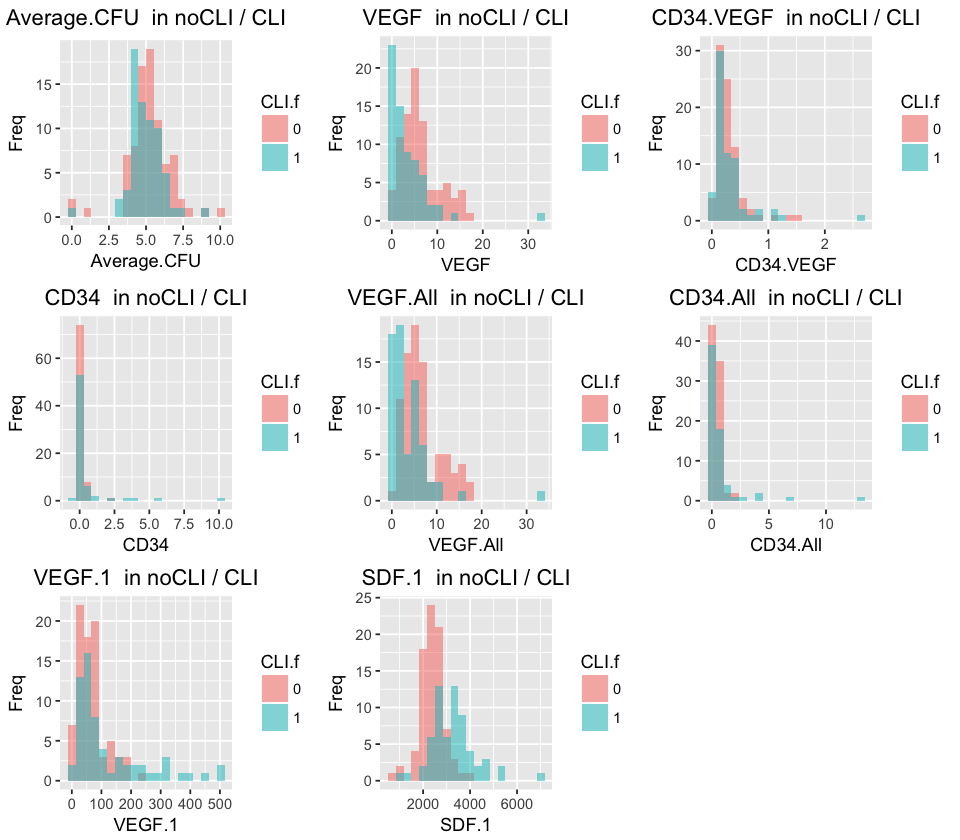

In [228]:
# 각각의 값에 대한 그래프 그리기
plots <- list()

for(key in c('Average.CFU', 'VEGF', 'CD34.VEGF', 'CD34', 'VEGF.All', 'CD34.All', 'VEGF.1', 'SDF.1')){

    p<- data %>% 
        mutate(CLI.f = as.factor(CLI)) %>%
        ggplot(aes_string(x=key, fill = "CLI.f")) +
        geom_histogram(alpha=0.5, position="identity",bins = 30, na.rm = T) +  
        ggtitle(paste(key, " in noCLI / CLI")) +
        labs(x=key, y="Freq") +
        theme(plot.title = element_text(hjust = 0.5))
    
    plots[[key]] <- p
}

options(repr.plot.width=8, repr.plot.height=7)
cat("\n\n<CLI 그룹에 따른 Lab data 시각화>\n")
grid.arrange(grobs=plots, ncol=3)



<CLI 그룹에 따른 Lab data 정규성 시각화>


Warning message:
“Removed 5 rows containing non-finite values (stat_qq).”Warning message:
“Removed 5 rows containing non-finite values (stat_qq).”

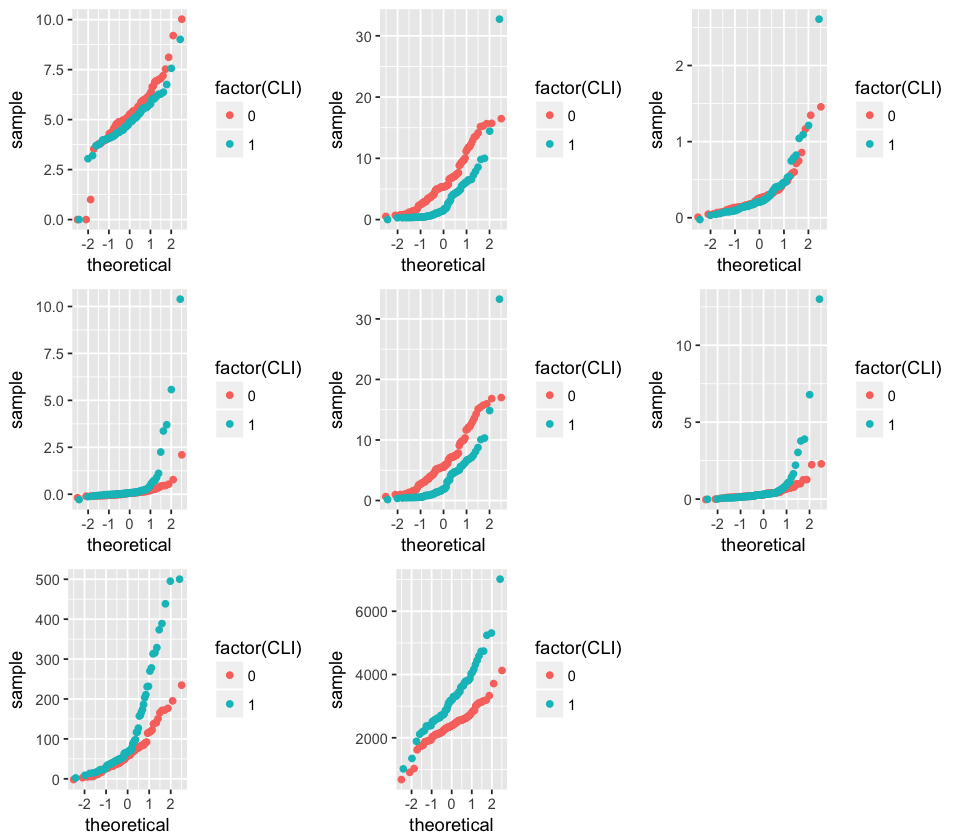

In [133]:
# 정규성 그래프

par(mfrow = c(3, 3))

for(key in c('Average.CFU', 'VEGF', 'CD34.VEGF', 'CD34', 'VEGF.All', 'CD34.All', 'VEGF.1', 'SDF.1')){
    p <- data %>% ggplot(aes_string(sample = key)) + stat_qq(aes(color=factor(CLI)))

    plots[[key]] <- p
}
options(repr.plot.width=8, repr.plot.height=7)
cat("\n\n<CLI 그룹에 따른 Lab data 정규성 시각화>\n")
grid.arrange(grobs=plots, ncol=3)

In [144]:
cat("\n<CLI 그룹에 따른 Lab data, 정규성 검정 결과>\n")
data %>% 
    group_by( CLI ) %>%
    summarise( Average.CFU = shapiro.test(Average.CFU)$p.value,
            VEGF = shapiro.test(VEGF)$p.value,
            CD34.VEGF = shapiro.test(CD34.VEGF)$p.value,
            CD34 = shapiro.test(CD34)$p.value,
            VEGF.All = shapiro.test(VEGF.All)$p.value,
            CD34.All = shapiro.test(CD34.All)$p.value,
            VEGF.1 = shapiro.test(VEGF.1)$p.value,
            SDF.1 = shapiro.test(SDF.1)$p.value
             ) %>%
    mutate_if(is.numeric, funs(round(., 4)))


<CLI 그룹에 따른 Lab data, 정규성 검정 결과>


CLI,Average.CFU,VEGF,CD34.VEGF,CD34,VEGF.All,CD34.All,VEGF.1,SDF.1
0,0e+00,1e-04,0,0,1e-04,0,0,0.0020
1,1e-04,0e+00,0,0,0e+00,0,0,0.0073


정규성을 만족하는 녀석들은 없다. 

In [188]:
cat("\n<CLI 그룹에 따른 로그변환 Lab data, 정규성 검정 결과>\n")
data %>% 
    group_by( CLI ) %>%
    summarise( log.Average.CFU = shapiro.test(log(Average.CFU))$p.value,
            log.VEGF = shapiro.test(log(VEGF))$p.value,
            log.CD34.VEGF = shapiro.test(log(CD34.VEGF))$p.value,
            log.CD34 = shapiro.test(log(CD34))$p.value,
            log.VEGF.All = shapiro.test(log(VEGF.All))$p.value,
            log.CD34.All = shapiro.test(log(CD34.All))$p.value,
            log.VEGF.1 = shapiro.test(log(VEGF.1))$p.value,
            log.SDF.1 = shapiro.test(log(SDF.1))$p.value
             ) %>%
    mutate_if(is.numeric, funs(round(., 4)))


<CLI 그룹에 따른 로그변환 Lab data, 정규성 검정 결과>


Warning message in log(CD34.VEGF):
“NaN이 생성되었습니다”Warning message in log(CD34):
“NaN이 생성되었습니다”Warning message in log(CD34):
“NaN이 생성되었습니다”Warning message in log(CD34.All):
“NaN이 생성되었습니다”Warning message in log(CD34.All):
“NaN이 생성되었습니다”Warning message in log(VEGF.1):
“NaN이 생성되었습니다”

CLI,log.Average.CFU,log.VEGF,log.CD34.VEGF,log.CD34,log.VEGF.All,log.CD34.All,log.VEGF.1,log.SDF.1
0,NaN,0.0012,0.0011,0.7485,0.0034,0.5097,0.0005,0.0000
1,NaN,0.0002,0.7798,0.3328,0.1149,0.0000,0.1223,0.0165


log 변환해도 정규성을 따른다고 볼만한 변수는 CD 34 뿐이다. 

위 결과를 기반으로 하면 대부분의 변수에 wilcoxon rank sum 검정을 실시해야하고, 

CD 34 만 로그 변환 후 t-test 를 시도해볼만한 가치가 있겠다. 

변수들간의 상관관계를 파악해보자. 

,Average.CFU,VEGF,VEGF.All,CD34.VEGF,CD34,CD34.All,VEGF.1,SDF.1
Average.CFU,1,0.12,0.11,-0.06,-0.13,-0.12,-0.11,-0.16
VEGF,NA,1.00,1.00,0.16,-0.10,-0.04,-0.10,-0.22
VEGF.All,NA,NA,1.00,0.23,-0.06,0.01,-0.08,-0.21
CD34.VEGF,NA,NA,NA,1.00,0.60,0.75,0.24,0.09
CD34,NA,NA,NA,NA,1.00,0.98,0.27,0.12
CD34.All,NA,NA,NA,NA,NA,1.00,0.28,0.12
VEGF.1,NA,NA,NA,NA,NA,NA,1.00,0.40
SDF.1,NA,NA,NA,NA,NA,NA,NA,1.00


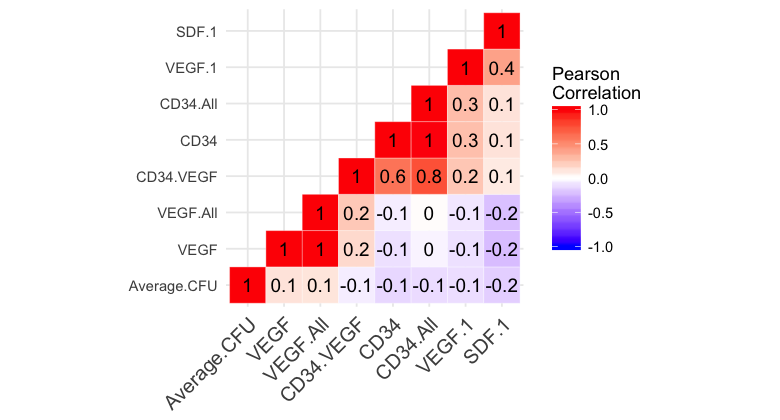

In [60]:
# 상관 계수를 살펴보자 

library(reshape2)

cormat <- round(cor(data[c(17, 18,21, 19, 20 ,22, 23, 24)], use = 'complete.obs'),2)
cormat[lower.tri(cormat)]<- NA
cormat
melted_cormat <- melt(cormat, na.rm = TRUE)

ggplot(data = melted_cormat, aes(Var2, Var1, fill = value))+
    geom_tile(color = "white")+
    scale_fill_gradient2(low = "blue", high = "red", mid = "white", 
                         midpoint = 0, limit = c(-1,1), space = "Lab", 
                         name="Pearson\nCorrelation") +
    theme_minimal()+ 
    theme(axis.text.x = element_text(angle = 45, vjust = 1, 
                                     size = 12, hjust = 1) , 
          axis.title.x=element_blank(), 
          axis.title.y=element_blank())+
    coord_fixed() + geom_text(aes(Var2, Var1, label = round(value,1)), color = "black", size = 4)

위 결과를 봤을 때, 
- CD34
- CD34.All
- CD34.VEGF

는 상관 관계가 매우 높아, 거의 한 변수로 봐도 될 정도

- VEGF
- VEGF.All

도 마찬가지 

log 에 대해서도 살펴보면

Warning message in FUN(X[[i]], ...):
“NaN이 생성되었습니다”Warning message in FUN(X[[i]], ...):
“NaN이 생성되었습니다”Warning message in FUN(X[[i]], ...):
“NaN이 생성되었습니다”Warning message in FUN(X[[i]], ...):
“NaN이 생성되었습니다”

,Average.CFU,VEGF,VEGF.All,CD34.VEGF,CD34,CD34.All,VEGF.1,SDF.1
Average.CFU,1,-0.02,-0.01,0.04,-0.02,0.01,-0.16,-0.04
VEGF,NA,1.00,0.96,0.27,0.00,0.08,-0.13,-0.31
VEGF.All,NA,NA,1.00,0.38,0.09,0.20,-0.15,-0.30
CD34.VEGF,NA,NA,NA,1.00,0.40,0.77,0.07,0.12
CD34,NA,NA,NA,NA,1.00,0.82,0.04,0.09
CD34.All,NA,NA,NA,NA,NA,1.00,0.07,0.16
VEGF.1,NA,NA,NA,NA,NA,NA,1.00,0.36
SDF.1,NA,NA,NA,NA,NA,NA,NA,1.00


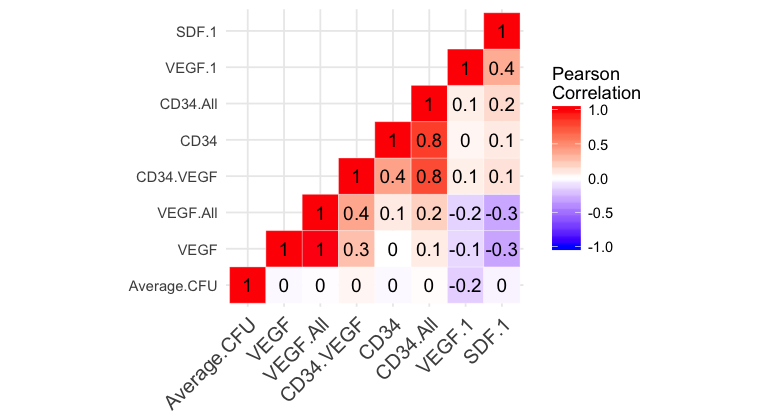

In [61]:
# 상관 계수를 살펴보자 

library(reshape2)

cormat <- round(cor(log(data[c(17, 18, 21, 19, 20 ,22, 23, 24)] + 1e-5), use = 'complete.obs'),2)
cormat[lower.tri(cormat)]<- NA
cormat
melted_cormat <- melt(cormat, na.rm = TRUE)

ggplot(data = melted_cormat, aes(Var2, Var1, fill = value))+
    geom_tile(color = "white")+
    scale_fill_gradient2(low = "blue", high = "red", mid = "white", 
                         midpoint = 0, limit = c(-1,1), space = "Lab", 
                         name="Pearson\nCorrelation") +
    theme_minimal()+ 
    theme(axis.text.x = element_text(angle = 45, vjust = 1, 
                                     size = 12, hjust = 1) , 
          axis.title.x=element_blank(), 
          axis.title.y=element_blank())+
    coord_fixed() + geom_text(aes(Var2, Var1, label = round(value,1)), color = "black", size = 4)

거의 비슷한 결과 

CD34 = CD34.All ~=CD34.VEGF

VEGF = VEGF.All 

VEGF.1 ~= SDF.1 

Average.CFU

## Lab data 검정

In [160]:
# Wilcoxon rank sum test for lab data

for(key in c('Average.CFU', 'VEGF', 'CD34.VEGF', 'CD34', 'VEGF.All', 'CD34.All', 'VEGF.1', 'SDF.1')){
    test <- wilcox.test(data[key][,1], data["CLI"][,1])
    cat("\n", key, "result :", "p-value =", test$p.value, '\n')
}


 Average.CFU result : p-value = 2.708907e-49 

 VEGF result : p-value = 2.302688e-36 

 CD34.VEGF result : p-value = 0.03191828 

 CD34 result : p-value = 0.002531329 

 VEGF.All result : p-value = 6.656316e-39 

 CD34.All result : p-value = 0.008142576 

 VEGF.1 result : p-value = 3.445605e-50 

 SDF.1 result : p-value = 1.492223e-51 


In [229]:
# log 값에 대한 분석 

for(key in c('Average.CFU', 'VEGF', 'CD34.VEGF', 'CD34', 'VEGF.All', 'CD34.All', 'VEGF.1', 'SDF.1')){
    test <- wilcox.test(log(data[key][,1]+1e-5), data["CLI"][,1])
    cat("\n", key, "result :", "p-value =", test$p.value, '\n')
}


 Average.CFU result : p-value = 8.692719e-48 

 VEGF result : p-value = 1.554135e-12 


Warning message in log(data[key][, 1] + 1e-05):
“NaN이 생성되었습니다”


 CD34.VEGF result : p-value = 4.537113e-47 


Warning message in log(data[key][, 1] + 1e-05):
“NaN이 생성되었습니다”


 CD34 result : p-value = 4.270591e-35 

 VEGF.All result : p-value = 2.720166e-15 


Warning message in log(data[key][, 1] + 1e-05):
“NaN이 생성되었습니다”


 CD34.All result : p-value = 1.566098e-38 


Warning message in log(data[key][, 1] + 1e-05):
“NaN이 생성되었습니다”


 VEGF.1 result : p-value = 3.590014e-50 

 SDF.1 result : p-value = 1.492223e-51 


전부 차이가 있다. 

그렇다면 이것이 앞서 demographic data 의 차이로 인한 것은 아닌지 한 번 살펴보자. 

DM + HTN + smoking + alcohol + statin 이 녀석들에 대한 것들을 고정으로 두고, 분석을 실시해보자. 

In [15]:
for(key in c('Average.CFU', 'VEGF', 'CD34.VEGF', 'CD34', 'VEGF.All', 'CD34.All', 'VEGF.1', 'SDF.1')){
    tmp0 <- data %>% filter(HTN==0) 
    test0 <- wilcox.test(log(tmp0[key][,1]+1e-5), jitter(tmp0["CLI"][,1]))
    tmp1 <- data %>% filter(HTN==1) 
    test1 <- wilcox.test(log(tmp1[key][,1]+1e-5), jitter(tmp1["CLI"][,1]))
    cat("\n", key, "result :", "\n    test0 p-value =", test0$p.value, '\n    test1 p-value =',test1$p.value, "\n")
}


 Average.CFU result : 
    test0 p-value = 8.570426e-10 
    test1 p-value = 1.656361e-40 

 VEGF result : 
    test0 p-value = 0.5400782 
    test1 p-value = 8.650893e-12 


Warning message in log(tmp1[key][, 1] + 1e-05):
“NaN이 생성되었습니다”


 CD34.VEGF result : 
    test0 p-value = 1.628381e-08 
    test1 p-value = 1.613334e-38 


Warning message in log(tmp0[key][, 1] + 1e-05):
“NaN이 생성되었습니다”Warning message in log(tmp1[key][, 1] + 1e-05):
“NaN이 생성되었습니다”


 CD34 result : 
    test0 p-value = 5.010026e-07 
    test1 p-value = 2.787352e-27 

 VEGF.All result : 
    test0 p-value = 0.3222796 
    test1 p-value = 3.111242e-15 


Warning message in log(tmp0[key][, 1] + 1e-05):
“NaN이 생성되었습니다”Warning message in log(tmp1[key][, 1] + 1e-05):
“NaN이 생성되었습니다”


 CD34.All result : 
    test0 p-value = 1.172434e-06 
    test1 p-value = 1.688027e-31 


Warning message in log(tmp1[key][, 1] + 1e-05):
“NaN이 생성되었습니다”


 VEGF.1 result : 
    test0 p-value = 8.570426e-10 
    test1 p-value = 3.076277e-41 

 SDF.1 result : 
    test0 p-value = 8.570426e-10 
    test1 p-value = 2.491434e-42 


In [ ]:
이런 식으로 하나하나 해봐야하는건가..? 너무 구린데..? 각각 분류하다보면 표본 수도 작아질테고..? 

In [ ]:
로그 선형 모형을 쓰는 것도 하나의 방법이 될 수 있을 것 같다. 
생각해보자.  

#### 로지스틱 회귀

앞서 만든 회귀모형에 지표들을 넣었을때 유의미한 효과를 거둘 수 있을지 확인해보자 

In [10]:
model <- glm(CLI ~ DM + HTN + alcohol + statin + Average.CFU, family = binomial(),data = data)
summary(model)


Call:
glm(formula = CLI ~ DM + HTN + alcohol + statin + Average.CFU, 
    family = binomial(), data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8476  -0.8923  -0.4233   0.7194   2.6722  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   2.0101     1.2322   1.631 0.102834    
DM            1.2750     0.4166   3.060 0.002211 ** 
HTN          -1.0254     0.6751  -1.519 0.128771    
alcohol      -1.7035     0.5841  -2.917 0.003538 ** 
statin       -1.5531     0.4391  -3.537 0.000405 ***
Average.CFU  -0.1993     0.2529  -0.788 0.430690    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 191.82  on 138  degrees of freedom
Residual deviance: 143.43  on 133  degrees of freedom
  (11 observations deleted due to missingness)
AIC: 155.43

Number of Fisher Scoring iterations: 4


In [38]:
model <- glm(CLI ~ DM + HTN + alcohol + statin + VEGF, family = binomial(),data = data)
summary(model)


Call:
glm(formula = CLI ~ DM + HTN + alcohol + statin + VEGF, family = binomial(), 
    data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9175  -0.7079  -0.3333   0.6655   2.8049  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  1.73332    0.72641   2.386 0.017026 *  
DM           1.17936    0.42612   2.768 0.005646 ** 
HTN         -1.14231    0.67667  -1.688 0.091385 .  
alcohol     -1.53568    0.58149  -2.641 0.008268 ** 
statin      -1.46066    0.43348  -3.370 0.000753 ***
VEGF        -0.12680    0.05796  -2.188 0.028697 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 191.82  on 138  degrees of freedom
Residual deviance: 138.36  on 133  degrees of freedom
  (11 observations deleted due to missingness)
AIC: 150.36

Number of Fisher Scoring iterations: 5


In [164]:
model <- glm(CLI ~ DM + HTN + alcohol + statin + CD34.VEGF, family = binomial(),data = data)
summary(model)


Call:
glm(formula = CLI ~ DM + HTN + alcohol + statin + CD34.VEGF, 
    family = binomial(), data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7678  -0.9510  -0.4640   0.6971   2.6247  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   1.2482     0.7099   1.758  0.07871 .  
DM            1.2632     0.4152   3.043  0.00234 ** 
HTN          -1.1667     0.6610  -1.765  0.07756 .  
alcohol      -1.8117     0.5724  -3.165  0.00155 ** 
statin       -1.6664     0.4242  -3.928 8.55e-05 ***
CD34.VEGF    -0.1301     0.6281  -0.207  0.83590    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 191.82  on 138  degrees of freedom
Residual deviance: 144.04  on 133  degrees of freedom
  (11 observations deleted due to missingness)
AIC: 156.04

Number of Fisher Scoring iterations: 4


In [165]:
model <- glm(CLI ~ DM + HTN + alcohol + statin + CD34, family = binomial(),data = data)
summary(model)


Call:
glm(formula = CLI ~ DM + HTN + alcohol + statin + CD34, family = binomial(), 
    data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7523  -0.9332  -0.4484   0.7387   2.5671  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   1.0507     0.6746   1.558 0.119352    
DM            1.1881     0.4182   2.841 0.004494 ** 
HTN          -1.1096     0.6568  -1.689 0.091150 .  
alcohol      -1.7325     0.5691  -3.044 0.002334 ** 
statin       -1.6137     0.4258  -3.790 0.000151 ***
CD34          0.5569     0.4651   1.197 0.231224    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 191.82  on 138  degrees of freedom
Residual deviance: 141.59  on 133  degrees of freedom
  (11 observations deleted due to missingness)
AIC: 153.59

Number of Fisher Scoring iterations: 5


In [166]:
model <- glm(CLI ~ DM + HTN + alcohol + statin + VEGF.All, family = binomial(),data = data)
summary(model)


Call:
glm(formula = CLI ~ DM + HTN + alcohol + statin + VEGF.All, family = binomial(), 
    data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9144  -0.7015  -0.3383   0.6953   2.7855  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  1.76621    0.73370   2.407 0.016073 *  
DM           1.18220    0.42588   2.776 0.005505 ** 
HTN         -1.14763    0.67768  -1.693 0.090369 .  
alcohol     -1.54350    0.58070  -2.658 0.007860 ** 
statin      -1.47048    0.43276  -3.398 0.000679 ***
VEGF.All    -0.12374    0.05722  -2.163 0.030579 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 191.82  on 138  degrees of freedom
Residual deviance: 138.43  on 133  degrees of freedom
  (11 observations deleted due to missingness)
AIC: 150.43

Number of Fisher Scoring iterations: 5


In [167]:
model <- glm(CLI ~ DM + HTN + alcohol + statin + CD34.All, family = binomial(),data = data)
summary(model)


Call:
glm(formula = CLI ~ DM + HTN + alcohol + statin + CD34.All, family = binomial(), 
    data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7964  -0.9229  -0.4523   0.7381   2.6098  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   1.0158     0.6875   1.478 0.139520    
DM            1.2186     0.4165   2.926 0.003435 ** 
HTN          -1.1245     0.6544  -1.718 0.085743 .  
alcohol      -1.7546     0.5703  -3.076 0.002096 ** 
statin       -1.6164     0.4239  -3.813 0.000137 ***
CD34.All      0.2814     0.2992   0.940 0.347001    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 191.82  on 138  degrees of freedom
Residual deviance: 142.74  on 133  degrees of freedom
  (11 observations deleted due to missingness)
AIC: 154.74

Number of Fisher Scoring iterations: 5


In [168]:
model <- glm(CLI ~ DM + HTN + alcohol + statin + VEGF.1, family = binomial(),data = data)
summary(model)


Call:
glm(formula = CLI ~ DM + HTN + alcohol + statin + VEGF.1, family = binomial(), 
    data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8208  -0.8675  -0.4025   0.8083   2.6405  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.519211   0.709043   0.732  0.46400   
DM           1.044480   0.428989   2.435  0.01490 * 
HTN         -0.997535   0.644516  -1.548  0.12169   
alcohol     -1.816530   0.598765  -3.034  0.00241 **
statin      -1.373648   0.434397  -3.162  0.00157 **
VEGF.1       0.005846   0.003061   1.910  0.05614 . 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 184.30  on 133  degrees of freedom
Residual deviance: 136.51  on 128  degrees of freedom
  (16 observations deleted due to missingness)
AIC: 148.51

Number of Fisher Scoring iterations: 5


In [169]:
model <- glm(CLI ~ DM + HTN + alcohol + statin + SDF.1, family = binomial(),data = data)
summary(model)


Call:
glm(formula = CLI ~ DM + HTN + alcohol + statin + SDF.1, family = binomial(), 
    data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6756  -0.7452  -0.3117   0.5723   2.5656  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.9499168  1.4759463  -2.676  0.00745 ** 
DM           1.0330808  0.4546202   2.272  0.02306 *  
HTN         -0.4094903  0.7550069  -0.542  0.58757    
alcohol     -1.3123051  0.5654070  -2.321  0.02029 *  
statin      -1.4328006  0.4614214  -3.105  0.00190 ** 
SDF.1        0.0016244  0.0004265   3.808  0.00014 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 184.30  on 133  degrees of freedom
Residual deviance: 120.42  on 128  degrees of freedom
  (16 observations deleted due to missingness)
AIC: 132.42

Number of Fisher Scoring iterations: 5


#### 결과 

- VEGF
- VEGF.All
- VEGF.1 (경계수준)
- SDF.1 

정도가 유의미하게 나옴 

---
## 분리선 ##
---

HTN 이 없는 모델에서 로지스틱 회귀를 실행해보자 

In [170]:
model <- glm(CLI ~ DM + alcohol + statin + Average.CFU, family = binomial(),data = data)
summary(model)


Call:
glm(formula = CLI ~ DM + alcohol + statin + Average.CFU, family = binomial(), 
    data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9430  -0.7329  -0.4176   0.7136   2.6556  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   1.6018     1.2165   1.317 0.187928    
DM            1.2510     0.4123   3.034 0.002412 ** 
alcohol      -1.6767     0.5805  -2.888 0.003875 ** 
statin       -1.5169     0.4304  -3.525 0.000424 ***
Average.CFU  -0.2989     0.2494  -1.198 0.230735    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 191.82  on 138  degrees of freedom
Residual deviance: 145.89  on 134  degrees of freedom
  (11 observations deleted due to missingness)
AIC: 155.89

Number of Fisher Scoring iterations: 4


In [171]:
model <- glm(CLI ~ DM + alcohol + statin + VEGF, family = binomial(),data = data)
summary(model)


Call:
glm(formula = CLI ~ DM + alcohol + statin + VEGF, family = binomial(), 
    data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9677  -0.7592  -0.3483   0.6846   2.7796  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   0.7709     0.4288   1.798 0.072215 .  
DM            1.1159     0.4180   2.670 0.007595 ** 
alcohol      -1.5253     0.5736  -2.659 0.007834 ** 
statin       -1.4757     0.4270  -3.456 0.000548 ***
VEGF         -0.1285     0.0574  -2.238 0.025216 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 191.82  on 138  degrees of freedom
Residual deviance: 141.36  on 134  degrees of freedom
  (11 observations deleted due to missingness)
AIC: 151.36

Number of Fisher Scoring iterations: 5


In [172]:
model <- glm(CLI ~ DM + alcohol + statin + CD34.VEGF, family = binomial(),data = data)
summary(model)


Call:
glm(formula = CLI ~ DM + alcohol + statin + CD34.VEGF, family = binomial(), 
    data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8194  -0.6515  -0.4851   0.6607   2.5729  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   0.2438     0.4085   0.597  0.55059    
DM            1.2129     0.4073   2.978  0.00290 ** 
alcohol      -1.8289     0.5690  -3.214  0.00131 ** 
statin       -1.6755     0.4175  -4.013    6e-05 ***
CD34.VEGF    -0.1033     0.6444  -0.160  0.87260    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 191.82  on 138  degrees of freedom
Residual deviance: 147.37  on 134  degrees of freedom
  (11 observations deleted due to missingness)
AIC: 157.37

Number of Fisher Scoring iterations: 4


In [173]:
model <- glm(CLI ~ DM + alcohol + statin + CD34, family = binomial(),data = data)
summary(model)


Call:
glm(formula = CLI ~ DM + alcohol + statin + CD34, family = binomial(), 
    data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8231  -0.6719  -0.4649   0.7064   2.5119  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.09217    0.35453   0.260 0.794889    
DM           1.14700    0.41098   2.791 0.005257 ** 
alcohol     -1.75498    0.56542  -3.104 0.001910 ** 
statin      -1.62021    0.41924  -3.865 0.000111 ***
CD34         0.64725    0.52059   1.243 0.213759    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 191.82  on 138  degrees of freedom
Residual deviance: 144.63  on 134  degrees of freedom
  (11 observations deleted due to missingness)
AIC: 154.63

Number of Fisher Scoring iterations: 6


In [174]:
model <- glm(CLI ~ DM + alcohol + statin + VEGF.All, family = binomial(),data = data)
summary(model)


Call:
glm(formula = CLI ~ DM + alcohol + statin + VEGF.All, family = binomial(), 
    data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9651  -0.7519  -0.3529   0.6892   2.7605  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.79958    0.43786   1.826 0.067834 .  
DM           1.11927    0.41767   2.680 0.007366 ** 
alcohol     -1.53568    0.57320  -2.679 0.007382 ** 
statin      -1.48780    0.42630  -3.490 0.000483 ***
VEGF.All    -0.12540    0.05662  -2.215 0.026774 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 191.82  on 138  degrees of freedom
Residual deviance: 141.48  on 134  degrees of freedom
  (11 observations deleted due to missingness)
AIC: 151.48

Number of Fisher Scoring iterations: 5


In [175]:
model <- glm(CLI ~ DM + alcohol + statin + CD34.All, family = binomial(),data = data)
summary(model)


Call:
glm(formula = CLI ~ DM + alcohol + statin + CD34.All, family = binomial(), 
    data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8608  -0.6704  -0.4698   0.7046   2.5597  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   0.0387     0.3789   0.102  0.91865    
DM            1.1753     0.4092   2.873  0.00407 ** 
alcohol      -1.7765     0.5669  -3.134  0.00173 ** 
statin       -1.6236     0.4171  -3.893 9.91e-05 ***
CD34.All      0.3224     0.3232   0.997  0.31853    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 191.82  on 138  degrees of freedom
Residual deviance: 145.89  on 134  degrees of freedom
  (11 observations deleted due to missingness)
AIC: 155.89

Number of Fisher Scoring iterations: 5


In [176]:
model <- glm(CLI ~ DM + alcohol + statin + VEGF.1, family = binomial(),data = data)
summary(model)


Call:
glm(formula = CLI ~ DM + alcohol + statin + VEGF.1, family = binomial(), 
    data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8963  -0.8480  -0.4144   0.7767   2.6050  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)   
(Intercept) -0.363178   0.411574  -0.882  0.37755   
DM           0.991064   0.419571   2.362  0.01817 * 
alcohol     -1.845616   0.590408  -3.126  0.00177 **
statin      -1.389921   0.428096  -3.247  0.00117 **
VEGF.1       0.006570   0.003106   2.115  0.03440 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 184.30  on 133  degrees of freedom
Residual deviance: 139.05  on 129  degrees of freedom
  (16 observations deleted due to missingness)
AIC: 149.05

Number of Fisher Scoring iterations: 5


In [178]:
model <- glm(CLI ~ DM + alcohol + statin + SDF.1, family = binomial(),data = data)
summary(model)


Call:
glm(formula = CLI ~ DM + alcohol + statin + SDF.1, family = binomial(), 
    data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6911  -0.7219  -0.3126   0.5822   2.5499  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -4.4477364  1.1717759  -3.796 0.000147 ***
DM           1.0178494  0.4530993   2.246 0.024677 *  
alcohol     -1.3125163  0.5637979  -2.328 0.019913 *  
statin      -1.4218438  0.4594014  -3.095 0.001968 ** 
SDF.1        0.0016748  0.0004166   4.020 5.82e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 184.30  on 133  degrees of freedom
Residual deviance: 120.72  on 129  degrees of freedom
  (16 observations deleted due to missingness)
AIC: 130.72

Number of Fisher Scoring iterations: 5


결과는 비슷하다 

- VEGF
- VEGF.All
- VEGF.1 
- SDF.1 

정도가 유의미한 지표로 쓰일 수 있을 것 같다. 

---
## 분리선
---

이번엔 로그 변환한 값들을 지표로 써보자 

In [180]:
model <- glm(CLI ~ DM + HTN + alcohol + statin + log(Average.CFU+1e-5), family = binomial(),data = data)
summary(model)


Call:
glm(formula = CLI ~ DM + HTN + alcohol + statin + log(Average.CFU + 
    1e-05), family = binomial(), data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8164  -0.9339  -0.4433   0.7203   2.6482  

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)                2.1480     2.0173   1.065 0.286976    
DM                         1.2569     0.4166   3.017 0.002556 ** 
HTN                       -1.0695     0.6811  -1.570 0.116380    
alcohol                   -1.7284     0.5837  -2.961 0.003063 ** 
statin                    -1.5737     0.4415  -3.564 0.000365 ***
log(Average.CFU + 1e-05)  -0.6764     1.3477  -0.502 0.615775    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 191.82  on 138  degrees of freedom
Residual deviance: 143.34  on 133  degrees of freedom
  (11 observations deleted due to missingness)
AIC: 1

In [181]:
model <- glm(CLI ~ DM + HTN + alcohol + statin + log(VEGF), family = binomial(),data = data)
summary(model)


Call:
glm(formula = CLI ~ DM + HTN + alcohol + statin + log(VEGF), 
    family = binomial(), data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1236  -0.7606  -0.3757   0.6636   2.4483  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   1.9935     0.7631   2.613 0.008987 ** 
DM            1.1049     0.4420   2.500 0.012428 *  
HTN          -1.1023     0.7025  -1.569 0.116659    
alcohol      -1.5409     0.5960  -2.585 0.009728 ** 
statin       -1.2837     0.4449  -2.885 0.003909 ** 
log(VEGF)    -0.7931     0.2276  -3.484 0.000493 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 191.82  on 138  degrees of freedom
Residual deviance: 129.77  on 133  degrees of freedom
  (11 observations deleted due to missingness)
AIC: 141.77

Number of Fisher Scoring iterations: 5


In [182]:
model <- glm(CLI ~ DM + HTN + alcohol + statin + log(CD34.VEGF), family = binomial(),data = data)
summary(model)

Warning message in log(CD34.VEGF):
“NaN이 생성되었습니다”


Call:
glm(formula = CLI ~ DM + HTN + alcohol + statin + log(CD34.VEGF), 
    family = binomial(), data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7670  -0.9462  -0.4633   0.7091   2.6314  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)     1.23988    0.75677   1.638 0.101344    
DM              1.24923    0.41747   2.992 0.002768 ** 
HTN            -1.16824    0.65633  -1.780 0.075083 .  
alcohol        -1.79503    0.57223  -3.137 0.001707 ** 
statin         -1.64108    0.42200  -3.889 0.000101 ***
log(CD34.VEGF)  0.03085    0.24870   0.124 0.901267    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 190.26  on 137  degrees of freedom
Residual deviance: 143.57  on 132  degrees of freedom
  (12 observations deleted due to missingness)
AIC: 155.57

Number of Fisher Scoring iterations: 4


In [183]:
model <- glm(CLI ~ DM + HTN + alcohol + statin + log(CD34), family = binomial(),data = data)
summary(model)

Warning message in log(CD34):
“NaN이 생성되었습니다”


Call:
glm(formula = CLI ~ DM + HTN + alcohol + statin + log(CD34), 
    family = binomial(), data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8386  -0.8827   0.0945   0.6615   2.6951  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)   1.4223     0.8657   1.643  0.10040   
DM            1.7233     0.5578   3.089  0.00201 **
HTN          -1.4903     0.8462  -1.761  0.07820 . 
alcohol      -1.6358     0.6717  -2.435  0.01488 * 
statin       -1.7621     0.5525  -3.189  0.00143 **
log(CD34)     0.1048     0.1822   0.575  0.56515   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 130.312  on 93  degrees of freedom
Residual deviance:  90.731  on 88  degrees of freedom
  (56 observations deleted due to missingness)
AIC: 102.73

Number of Fisher Scoring iterations: 5


In [184]:
model <- glm(CLI ~ DM + HTN + alcohol + statin + log(VEGF.All), family = binomial(),data = data)
summary(model)


Call:
glm(formula = CLI ~ DM + HTN + alcohol + statin + log(VEGF.All), 
    family = binomial(), data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0868  -0.7744  -0.3715   0.7170   2.4592  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)     2.1768     0.7772   2.801 0.005097 ** 
DM              1.1346     0.4408   2.574 0.010056 *  
HTN            -1.1340     0.6993  -1.622 0.104883    
alcohol        -1.5749     0.5961  -2.642 0.008238 ** 
statin         -1.3091     0.4428  -2.956 0.003115 ** 
log(VEGF.All)  -0.8404     0.2466  -3.409 0.000653 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 191.82  on 138  degrees of freedom
Residual deviance: 130.61  on 133  degrees of freedom
  (11 observations deleted due to missingness)
AIC: 142.61

Number of Fisher Scoring iterations: 5


In [185]:
model <- glm(CLI ~ DM + HTN + alcohol + statin + log(CD34.All), family = binomial(),data = data)
summary(model)

Warning message in log(CD34.All):
“NaN이 생성되었습니다”


Call:
glm(formula = CLI ~ DM + HTN + alcohol + statin + log(CD34.All), 
    family = binomial(), data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8221  -0.7155  -0.4372   0.7193   2.6987  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)     1.3354     0.7236   1.846 0.064964 .  
DM              1.3613     0.4357   3.124 0.001783 ** 
HTN            -1.5732     0.7324  -2.148 0.031721 *  
alcohol        -1.8930     0.5819  -3.253 0.001142 ** 
statin         -1.7015     0.4398  -3.869 0.000109 ***
log(CD34.All)  -0.2272     0.1842  -1.234 0.217308    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 187.80  on 135  degrees of freedom
Residual deviance: 138.12  on 130  degrees of freedom
  (14 observations deleted due to missingness)
AIC: 150.12

Number of Fisher Scoring iterations: 5


In [186]:
model <- glm(CLI ~ DM + HTN + alcohol + statin + log(VEGF.1), family = binomial(),data = data)
summary(model)

Warning message in log(VEGF.1):
“NaN이 생성되었습니다”


Call:
glm(formula = CLI ~ DM + HTN + alcohol + statin + log(VEGF.1), 
    family = binomial(), data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7719  -0.9335  -0.4192   0.7408   2.5915  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   0.1504     1.2129   0.124 0.901327    
DM            1.1552     0.4270   2.706 0.006817 ** 
HTN          -1.0794     0.6519  -1.656 0.097759 .  
alcohol      -1.7460     0.5776  -3.023 0.002505 ** 
statin       -1.4442     0.4349  -3.321 0.000898 ***
log(VEGF.1)   0.2214     0.2324   0.953 0.340594    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 183.10  on 132  degrees of freedom
Residual deviance: 139.64  on 127  degrees of freedom
  (17 observations deleted due to missingness)
AIC: 151.64

Number of Fisher Scoring iterations: 4


In [187]:
model <- glm(CLI ~ DM + HTN + alcohol + statin + log(SDF.1), family = binomial(),data = data)
summary(model)


Call:
glm(formula = CLI ~ DM + HTN + alcohol + statin + log(SDF.1), 
    family = binomial(), data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7008  -0.7824  -0.3129   0.5883   2.5256  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -28.9774     8.8006  -3.293 0.000992 ***
DM            1.0372     0.4463   2.324 0.020137 *  
HTN          -0.5145     0.7271  -0.708 0.479149    
alcohol      -1.3226     0.5741  -2.304 0.021238 *  
statin       -1.4258     0.4519  -3.155 0.001605 ** 
log(SDF.1)    3.7438     1.0957   3.417 0.000634 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 184.30  on 133  degrees of freedom
Residual deviance: 124.81  on 128  degrees of freedom
  (16 observations deleted due to missingness)
AIC: 136.81

Number of Fisher Scoring iterations: 5


#### 결과

log 변환 한 값들 중

- VEGF
- VEGF.All 
- SDF.1 

들이 유의미한 지표로 보인다. 

VEFG.1 까지 고려해서 모델을 만들어보면 좋을 것 같다. 

가장 p-value 가 낮은 SDF1 부터 추가해보자 


In [197]:
model <- glm(CLI ~ DM + alcohol + statin + SDF.1 + log(VEGF), family = binomial(),data = data)
summary(model)


Call:
glm(formula = CLI ~ DM + alcohol + statin + SDF.1 + log(VEGF), 
    family = binomial(), data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6455  -0.7564  -0.2800   0.5344   2.2795  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.4778927  1.2682554  -2.742 0.006102 ** 
DM           0.9859694  0.4732057   2.084 0.037197 *  
alcohol     -1.1470637  0.5990609  -1.915 0.055522 .  
statin      -1.2070588  0.4776699  -2.527 0.011505 *  
SDF.1        0.0015784  0.0004401   3.587 0.000335 ***
log(VEGF)   -0.6238228  0.2409177  -2.589 0.009615 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 184.30  on 133  degrees of freedom
Residual deviance: 113.18  on 128  degrees of freedom
  (16 observations deleted due to missingness)
AIC: 125.18

Number of Fisher Scoring iterations: 5


In [200]:
model <- glm(CLI ~ DM + alcohol + statin + SDF.1 + log(VEGF) +log(VEGF.All), family = binomial(),data = data)
summary(model)


Call:
glm(formula = CLI ~ DM + alcohol + statin + SDF.1 + log(VEGF) + 
    log(VEGF.All), family = binomial(), data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6886  -0.7369  -0.2832   0.5455   2.3102  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -3.719010   1.372442  -2.710 0.006733 ** 
DM             0.945876   0.478563   1.976 0.048099 *  
alcohol       -1.133656   0.593617  -1.910 0.056166 .  
statin        -1.208802   0.479698  -2.520 0.011738 *  
SDF.1          0.001572   0.000441   3.564 0.000365 ***
log(VEGF)     -1.762064   2.410342  -0.731 0.464753    
log(VEGF.All)  1.250101   2.619387   0.477 0.633185    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 184.30  on 133  degrees of freedom
Residual deviance: 112.93  on 127  degrees of freedom
  (16 observations deleted due to missingness)
AIC: 126.93

Numb

둘 다 유의해지지 않는걸보니, 공선성 때문인 것 같다. 


In [203]:
round(cor(data[17:24], use="complete.obs"),2)

,Average.CFU,VEGF,CD34.VEGF,CD34,VEGF.All,CD34.All,VEGF.1,SDF.1
Average.CFU,1.00,0.12,-0.05,-0.13,0.12,-0.12,-0.11,-0.16
VEGF,0.12,1.00,0.16,-0.10,1.00,-0.04,-0.10,-0.22
CD34.VEGF,-0.05,0.16,1.00,0.60,0.23,0.75,0.24,0.09
CD34,-0.13,-0.10,0.60,1.00,-0.06,0.98,0.27,0.12
VEGF.All,0.12,1.00,0.23,-0.06,1.00,0.01,-0.08,-0.21
CD34.All,-0.12,-0.04,0.75,0.98,0.01,1.00,0.28,0.12
VEGF.1,-0.11,-0.10,0.24,0.27,-0.08,0.28,1.00,0.40
SDF.1,-0.16,-0.22,0.09,0.12,-0.21,0.12,0.40,1.00


VEGF 와 VEGF.All 은 실제로 같은 변수임을 확인할 수 있다. 

VEGF 1 은 넣어서 돌려봐도 어차피 안된다. 

In [211]:
model <- glm(CLI ~ DM + alcohol + statin + log(SDF.1) + log(VEGF), family = binomial(),data = data)
summary(model)


Call:
glm(formula = CLI ~ DM + alcohol + statin + log(SDF.1) + log(VEGF), 
    family = binomial(), data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7050  -0.7705  -0.2944   0.5402   2.3811  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept) -27.1232     8.8773  -3.055  0.00225 **
DM            0.9686     0.4626   2.094  0.03629 * 
alcohol      -1.1523     0.6040  -1.908  0.05641 . 
statin       -1.1771     0.4679  -2.516  0.01188 * 
log(SDF.1)    3.5427     1.1228   3.155  0.00160 **
log(VEGF)    -0.6385     0.2378  -2.686  0.00724 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 184.30  on 133  degrees of freedom
Residual deviance: 117.14  on 128  degrees of freedom
  (16 observations deleted due to missingness)
AIC: 129.14

Number of Fisher Scoring iterations: 5


## Lab data 검정 결과 

여러가지 해보니 
두 그룹에서 지표의 차이를 보는 것은 큰 의미가 없다 (모두 차이남)

로지스틱 회귀로, CLI 유무를 분류하는 모델을 세운다면 

- SDF.1
- VEGF

정도를 모델에 넣어서 하는 것이 좋을 것 같다. 
log 변환한 값도 나쁘지 않은 것 같다. 

나머지 변수는 넣어도 소용 없다. 

In [ ]:
로그선형모형 시도

In [62]:
li

asldkfj
asldkfj




Attaching package: ‘MASS’

The following object is masked from ‘package:dplyr’:

    select

